In [1]:
# pip install newsapi-python==0.2.5

In [44]:
# Initial imports

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import tensorflow as tf
import seaborn as sns
%matplotlib inline

import os
import requests
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
sid = SentimentIntensityAnalyzer()

import panel as pn
from panel.interact import interact
import param
pn.extension()


In [2]:
# Read your api key environment variable

# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])
glassnode = os.getenv("GLASSNODE_API")

# Set nomics/other crypto data API key 
# Not necessary if just downloading dataframes

---
## Crypto returns

In [3]:
# Use selected API to obtain historical prices for selected Crypto
# More than likely going to obtain latest data for selected cryptos but historical data will work well
btc_data = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close', params={'a': 'BTC', 's': 1585717199, 'u':1619845199, 'api_key': glassnode})

In [4]:
# Create dataframes to house crypto data
# May be helpful to just run it through postman to have a dataframe already made and just clean up
# Drop unnecessary columns, keep only crypto name, date and price
# Create new column for daily returns and fill using pct_change 
btc_df = pd.read_json(btc_data.text, convert_dates=['t'])
btc_df.columns = ['Date', 'BTC Price']
btc_df.set_index('Date', inplace=True)
btc_df

,BTC Price
Date,
2020-04-01,6589.249192
2020-04-02,6795.042992
2020-04-03,6736.363814
2020-04-04,6858.697010
2020-04-05,6794.474524
2020-04-06,7248.724102
2020-04-07,7172.878289
2020-04-08,7335.369799
2020-04-09,7301.012775


In [5]:
btc_df["Returns"] = btc_df['BTC Price'].pct_change()
btc_df["Returns"] = btc_df["Returns"]*100
btc_df

,BTC Price,Returns
Date,,
2020-04-01,6589.249192,NaN
2020-04-02,6795.042992,3.123175
2020-04-03,6736.363814,-0.863559
2020-04-04,6858.697010,1.816012
2020-04-05,6794.474524,-0.936366
2020-04-06,7248.724102,6.685573
2020-04-07,7172.878289,-1.046333
2020-04-08,7335.369799,2.265360
2020-04-09,7301.012775,-0.468375


---
## Sentiment analysis (primitive, limited machine learning)

In [25]:
# Fetch Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin OR BTC", 
#                                   from_param ="2021-04-03",
                                  page_size=100,
                                  language="en")
btc_news

{'status': 'ok',
 'totalResults': 10663,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Venmo now lets users buy and sell Bitcoin and Ethereum',
   'description': 'Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\nFour cryptocurrencies are currently supported: Bitcoin, Ethereum, Lit…',
   'url': 'https://mashable.com/article/venmo-crypto/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F04%252F20%252F25%252F7a02027586334a4d9d29757c0a859526.96c21.jpg%252F1200x630.jpg?signature=I7wBwCsXyeLkGNdX3wFvzAV_v7o=',
   'publishedAt': '2021-04-20T11:23:13Z',
   'content': 'Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… 

In [26]:
# Consider using previously defined function(s):
def create_df(news, language):
    articles = []
    date = []
    for article in news:
        try:
            text = article["content"]
            Date = article["publishedAt"][:10]
            articles.append({
                "text": text,
                "Date": Date,
            })
        except AttributeError:
            pass
    return pd.DataFrame(articles)

# For headlines:
# Example:
# btc_headlines, dates = get_headlines("bitcoin")

# def headline_sentiment_summarizer_avg(headlines):
#     sentiment = []
#     for day in headlines:
#         day_score = []
#         for h in day:
#             if h == None:
#                 continue
#             else:
#                 day_score.append(sid.polarity_scores(h)["compound"])
#         sentiment.append(sum(day_score) / len(day_score))
#     return sentiment
# The function above should retain dates already

In [27]:
# Create necessary sentiment scores DataFrame(s)
btc_news_df = create_df(btc_news["articles"], "en")

# Sentiment scores dictionaries
# Example:
btc_text = {
    "Negative": [],
    "Positive": [],
    "Neutral": [],
    "Compound": [],
}

# Get sentiment for the text 
# Example:
for index, row in btc_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = sid.polarity_scores(row["text"])
        btc_text["Negative"].append(text_sentiment["neg"])
        btc_text["Positive"].append(text_sentiment["pos"])
        btc_text["Neutral"].append(text_sentiment["neu"])
        btc_text["Compound"].append(text_sentiment["compound"])
    except AttributeError:
        pass
btc_sentiment_df = pd.DataFrame.from_dict(btc_text, orient='columns')
btc_sentiment_df = btc_sentiment_df.join(btc_news_df)
btc_sentiment_df.head(20)

# Should be easy to remake for additional crypto
# Find a way to retain dates from articles to match up with return dates
# 

,Negative,Positive,Neutral,Compound,Date,text
0,0.000,0.034,0.966,0.0258,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...
1,0.070,0.000,0.930,-0.3400,2021-04-06,This article was translated from our Spanish e...
2,0.000,0.000,1.000,0.0000,2021-04-08,Opinions expressed by Entrepreneur contributor...
3,0.060,0.063,0.877,0.0258,2021-04-24,"April\r\n24, 2021\r\n4 min read\r\nThis story ..."
4,0.000,0.000,1.000,0.0000,2021-04-27,Tesla’s relationship with bitcoin is not a dal...
5,0.000,0.171,0.829,0.7506,2021-04-20,Cryptocurrency continues to gain mainstream ac...
6,0.083,0.148,0.769,0.2960,2021-04-28,Mastercard and BNY Mellon warmed to bitcoin on...
7,0.000,0.000,1.000,0.0000,2021-05-05,Bitcoin will become available to customers of ...
8,0.094,0.000,0.906,-0.4767,2021-04-28,A Bitcoin logo is displayed at the Bitcoin Cen...
9,0.000,0.000,1.000,0.0000,2021-04-23,Cryptocurrency prices continued to tumble Frid...


In [28]:
# btc_sentiment_df.set_index("Date", inplace=True)
# btc_sentiment_df

btc_sentiment_df['Date'] = pd.to_datetime(btc_sentiment_df['Date'])
btc_sentiment_df = btc_sentiment_df.set_index('Date')
btc_sentiment_df

,Negative,Positive,Neutral,Compound,text
Date,,,,,
2021-04-20,0.000,0.034,0.966,0.0258,Venmo is jumping aboard the cryptocurrency ban...
2021-04-06,0.070,0.000,0.930,-0.3400,This article was translated from our Spanish e...
2021-04-08,0.000,0.000,1.000,0.0000,Opinions expressed by Entrepreneur contributor...
2021-04-24,0.060,0.063,0.877,0.0258,"April\r\n24, 2021\r\n4 min read\r\nThis story ..."
2021-04-27,0.000,0.000,1.000,0.0000,Tesla’s relationship with bitcoin is not a dal...
2021-04-20,0.000,0.171,0.829,0.7506,Cryptocurrency continues to gain mainstream ac...
2021-04-28,0.083,0.148,0.769,0.2960,Mastercard and BNY Mellon warmed to bitcoin on...
2021-05-05,0.000,0.000,1.000,0.0000,Bitcoin will become available to customers of ...
2021-04-28,0.094,0.000,0.906,-0.4767,A Bitcoin logo is displayed at the Bitcoin Cen...


In [29]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Negative,Positive,Neutral,Compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.036020,0.064830,0.899160,0.109282
std,0.057066,0.066673,0.091293,0.367668
min,0.000000,0.000000,0.621000,-0.836700
25%,0.000000,0.000000,0.833000,0.000000
50%,0.000000,0.059500,0.909000,0.000000
75%,0.070000,0.100750,1.000000,0.361200
max,0.292000,0.269000,1.000000,0.817600


In [30]:
btc_total = pd.merge(btc_df, btc_sentiment_df, how='inner', on='Date')
btc_total

,BTC Price,Returns,Negative,Positive,Neutral,Compound,text
Date,,,,,,,
2021-04-05,58898.765898,0.248430,0.123,0.033,0.844,-0.5417,First find a way not to pay for the power your...
2021-04-06,58243.453940,-1.112607,0.070,0.000,0.930,-0.3400,This article was translated from our Spanish e...
2021-04-06,58243.453940,-1.112607,0.000,0.091,0.909,0.4019,"Reuters\r\nSquare, Fidelity, Coinbase, and oth..."
2021-04-06,58243.453940,-1.112607,0.000,0.171,0.829,0.7351,"In the first quarter of 2021, American consume..."
2021-04-06,58243.453940,-1.112607,0.000,0.000,1.000,0.0000,By Reuters Staff\r\nApril 6 (Reuters) - Short-...
2021-04-06,58243.453940,-1.112607,0.000,0.071,0.929,0.2960,By Reuters Staff\r\n(Reuters) - Short-seller H...
2021-04-07,56219.396299,-3.475168,0.142,0.100,0.758,-0.1779,Opinions expressed by Entrepreneur contributor...
2021-04-07,56219.396299,-3.475168,0.000,0.000,1.000,0.0000,A decline in bitcoin of more than 4% transpire...
2021-04-08,58321.107135,3.738409,0.000,0.000,1.000,0.0000,Opinions expressed by Entrepreneur contributor...


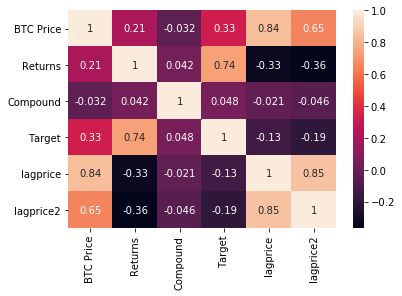

In [63]:
btc_mean = btc_total.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
btc_corr = btc_mean.drop(columns=["Negative", "Positive", "Neutral"])
btc_corr['lagprice'] = btc_corr['BTC Price'].shift(1)
btc_corr['lagprice2'] = btc_corr['BTC Price'].shift(2)
sns.heatmap(btc_corr.corr(), annot = True)
plt.savefig('Plots/heatmap.png')

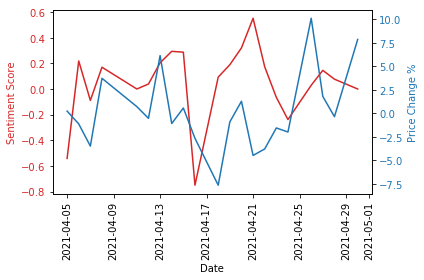

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color=color)
ax1.plot(btc_mean['Compound'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price Change %', color=color)  
ax2.plot(btc_mean['Returns'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()
# plt.savefig('Plots/lines.png')

In [33]:
btc_total['Target'] = np.where(btc_total['Returns'] >= 0, 1, 0)
btc_total

,BTC Price,Returns,Negative,Positive,Neutral,Compound,text,Target
Date,,,,,,,,
2021-04-05,58898.765898,0.248430,0.123,0.033,0.844,-0.5417,First find a way not to pay for the power your...,1
2021-04-06,58243.453940,-1.112607,0.070,0.000,0.930,-0.3400,This article was translated from our Spanish e...,0
2021-04-06,58243.453940,-1.112607,0.000,0.091,0.909,0.4019,"Reuters\r\nSquare, Fidelity, Coinbase, and oth...",0
2021-04-06,58243.453940,-1.112607,0.000,0.171,0.829,0.7351,"In the first quarter of 2021, American consume...",0
2021-04-06,58243.453940,-1.112607,0.000,0.000,1.000,0.0000,By Reuters Staff\r\nApril 6 (Reuters) - Short-...,0
2021-04-06,58243.453940,-1.112607,0.000,0.071,0.929,0.2960,By Reuters Staff\r\n(Reuters) - Short-seller H...,0
2021-04-07,56219.396299,-3.475168,0.142,0.100,0.758,-0.1779,Opinions expressed by Entrepreneur contributor...,0
2021-04-07,56219.396299,-3.475168,0.000,0.000,1.000,0.0000,A decline in bitcoin of more than 4% transpire...,0
2021-04-08,58321.107135,3.738409,0.000,0.000,1.000,0.0000,Opinions expressed by Entrepreneur contributor...,1


In [34]:
#Setting X and y variables
X = btc_total["text"]
y = btc_total["Target"]

# Split data into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [35]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [36]:
print(f"Train: {train.shape[0]} rows and {train.shape[1]} columns")
print(f"{train['Target'].value_counts()}\n")
print(f"Test: {test.shape[0]} rows and {test.shape[1]} columns")
print(test['Target'].value_counts())

Train: 48 rows and 2 columns
0    32
1    16
Name: Target, dtype: int64

Test: 22 rows and 2 columns
0    13
1     9
Name: Target, dtype: int64


In [37]:
train[['neg', 'neu', 'pos', 'compound']] = train['text'].apply(sid.polarity_scores).apply(pd.Series)
train

,text,Target,neg,neu,pos,compound
Date,,,,,,
2021-04-19,Asian shares hit a one-month high on Monday he...,0,0.150,0.662,0.188,0.1280
2021-04-20,A representation of virtual currency Bitcoin i...,1,0.000,1.000,0.000,0.0000
2021-04-14,Coinbase Global Inc made its stock market debu...,0,0.000,0.906,0.094,0.2500
2021-04-28,By Reuters Staff\r\nApril 28 (Reuters) - Tesla...,0,0.085,0.915,0.000,-0.4019
2021-04-14,Coinbase is set to directly list on the Nasdaq...,0,0.000,0.914,0.086,0.4939
2021-04-22,"Coinswitch Kuber, a startup that allows young ...",0,0.000,0.909,0.091,0.3400
2021-04-08,Opinions expressed by Entrepreneur contributor...,1,0.000,1.000,0.000,0.0000
2021-04-15,Michael Novogratz is the founder and chief exe...,1,0.000,1.000,0.000,0.0000
2021-04-27,LAN network cables plugged into a Bitcoin mini...,1,0.000,1.000,0.000,0.0000


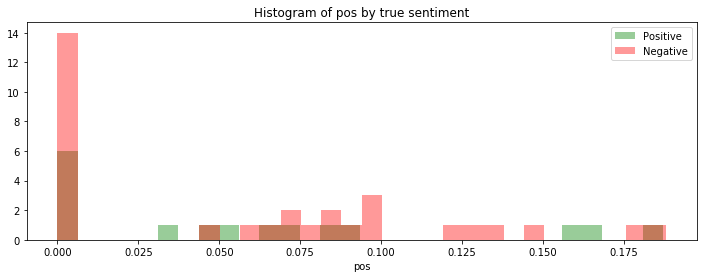

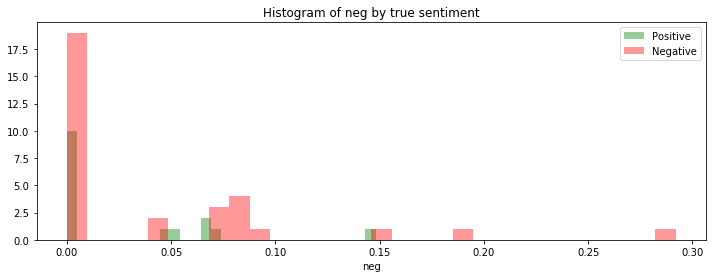

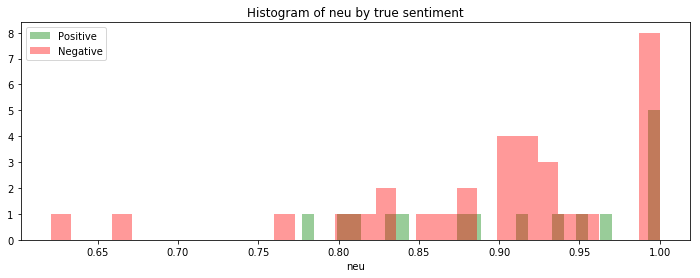

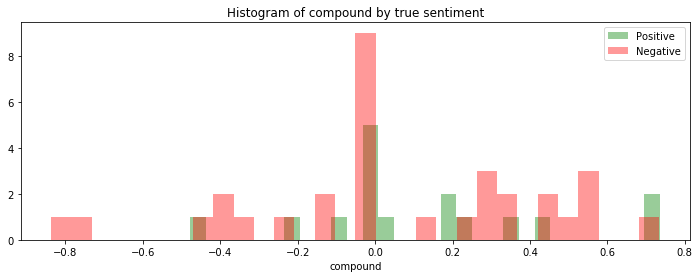

In [38]:
for var in ['pos', 'neg', 'neu', 'compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment');

In [39]:
# Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix, classification_report

train['vader_polarity'] = np.where(train['pos']>train['neg'], 1, 0)
target_names=['negative', 'positive']
print(classification_report(train['Target'], 
                            train['vader_polarity'], 
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.68      0.53      0.60        32
    positive       0.35      0.50      0.41        16

    accuracy                           0.52        48
   macro avg       0.51      0.52      0.50        48
weighted avg       0.57      0.52      0.53        48



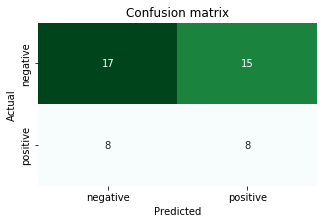

In [40]:
# Create function so that we could reuse later
def plot_cm(y_test, y_pred, target_names=['negative', 'positive'], 
            figsize=(5,3)):
    """Create a labelled confusion matrix plot."""
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Actual')
    ax.set_yticklabels(target_names, 
                       fontdict={'verticalalignment': 'center'});
# Plot confusion matrix
plot_cm(train['Target'], train['vader_polarity'])

In [41]:
train['vader_compound'] = np.where(train['compound']>0, 1, 0)
print(classification_report(train['Target'], 
                            train['vader_compound'], 
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.69      0.56      0.62        32
    positive       0.36      0.50      0.42        16

    accuracy                           0.54        48
   macro avg       0.53      0.53      0.52        48
weighted avg       0.58      0.54      0.55        48



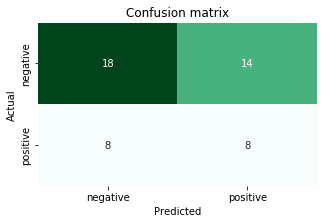

In [42]:
plot_cm(train['Target'], train['vader_compound'])

In [43]:
# Accuracy
from sklearn.metrics import accuracy_score

print("Vader Accuracy - Polarity: %.2f" % (accuracy_score(train['Target'], train['vader_polarity'])))
print("Vader Accuracy - Compound: %.2f" % (accuracy_score(train['Target'], train['vader_compound'])))

Vader Accuracy - Polarity: 0.52
Vader Accuracy - Compound: 0.54


---
## Dashboard

In [ ]:
# #New dataframe containing crypto data
# #Using only BTC for now with multiple columns as placeholders
# crypto_df = 

In [ ]:
# #Dashboard construction

# # Class containing dropdown menu for cryptos, relevant plots and dataframes
# class CryptoDashboard(param.Parameterized):
    
#     #Crypto dropdown selector
#     Crypto = param.ObjectSelector

In [58]:
def bitcoin_heatmap():
    btc_heatmap = sns.heatmap(btc_corr.corr(), annot = True)
    return btc_heatmap
def bitcoin_histogram():
    for var in ['pos', 'neg', 'neu', 'compound']:
        plt.figure(figsize=(12,4))
        sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                     color='green', label='Positive')
        sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                     color='red', label='Negative')
        plt.legend()
        plt.title(f'Histogram of {var} by true sentiment');
    return ax
def bitcoin_lines():
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Sentiment Score', color=color)
    ax1.plot(btc_mean['Compound'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Price Change %', color=color)  
    ax2.plot(btc_mean['Returns'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    plt.show()
    return plt.show()

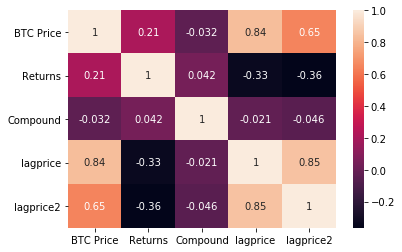

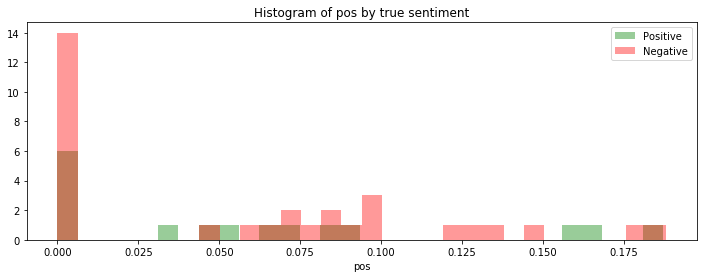

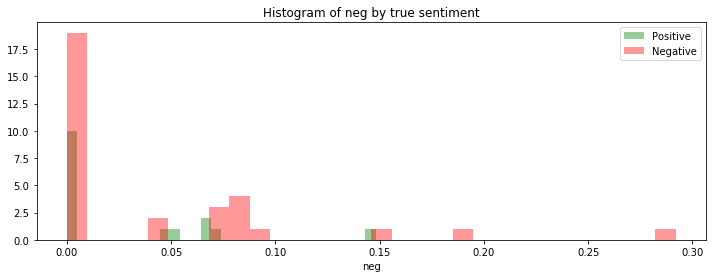

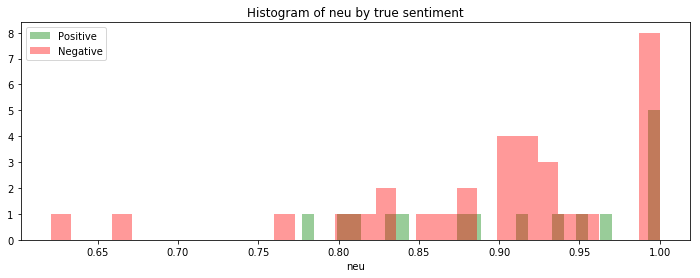

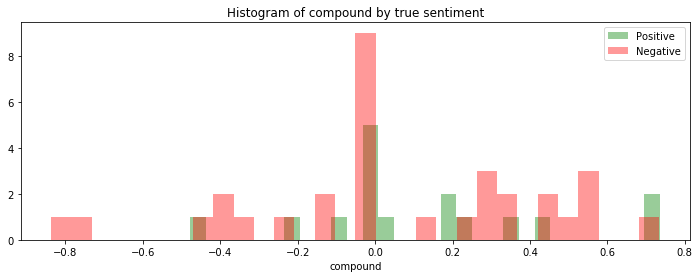

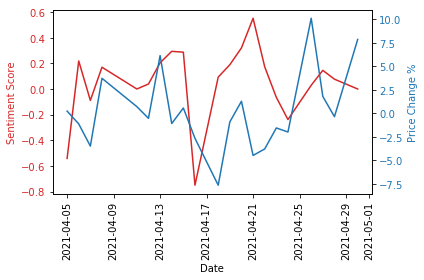

In [53]:
#Dashboard elements
dash_title = "# NLP-Crypto-Project"

#Dashboard description
dash_desc = " Our project aims to examine the relationship between public sentiment indicators and the prices of various cryptocurrencies. "

#Dashboard construction
dashboard = pn.Column(
    "## Sentiment Analysis of Bitcoin",
    bitcoin_heatmap,
    bitcoin_histogram,
    bitcoin_lines
)

In [1]:
dashboard.embed()

NameError: name 'dashboard' is not defined

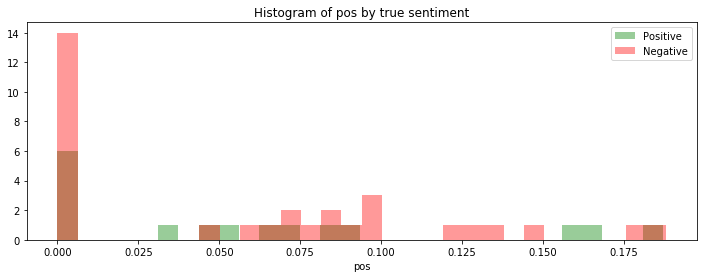

In [66]:
# for var in ['pos', 'neg', 'neu', 'compound']:
for var in ['pos']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig('Plots/pos_hist.png');

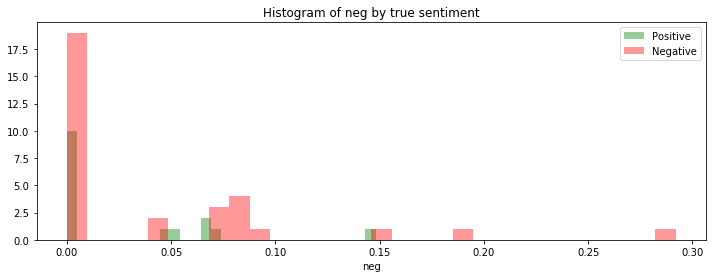

In [67]:
for var in ['neg']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig('Plots/neg_hist.png');

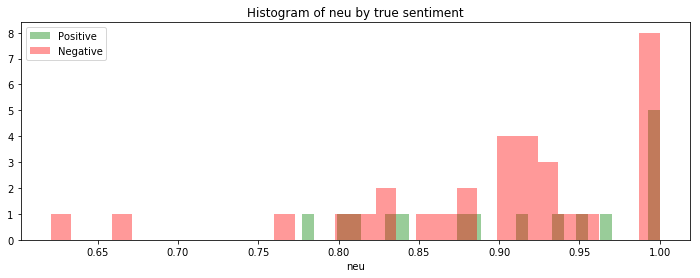

In [68]:
for var in ['neu']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig('Plots/neu_hist.png');

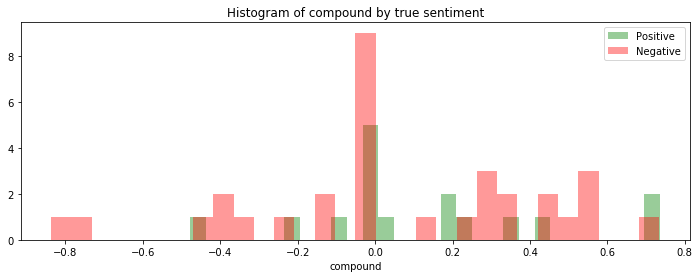

In [69]:
for var in ['compound']:
    plt.figure(figsize=(12,4))
    sns.distplot(train.query("Target==1")[var], bins=30, kde=False, 
                 color='green', label='Positive')
    sns.distplot(train.query("Target==0")[var], bins=30, kde=False, 
                 color='red', label='Negative')
    plt.legend()
    plt.title(f'Histogram of {var} by true sentiment')
    plt.savefig('Plots/comp_hist.png');